# Lecture 5

## Introduction to Keras
- Keras is an open source deep learning framework for Python
- It provides high-level building blocks for developing deep learning models
- It has been developed by an artificial intelligence researcher at Google named Francois Chollet
- Currently used by many leading companies

### What is Keras?

- Keras is a high-level interface for more specialized, well-optimized tensor manipulation libraries.
  - Such libraries serve as the **backend engigne** of Keras
    - TensorFlow, or Microsoft Cognitive Toolkit (CNTK), or Theano

- It does not handle itself low-level operations such as tensor products, convolutions, etc.
- It was developed with a focus on enabling fast experimentation


## Tensorflow
- open-source software library
- Intensely optimized for fast Numerical computations
- Widely used for Machine Learning/Deep Learning
- First public release, TensorFlow 1.0.0, 2017
- Based on tensors: Generalization of vectors and matrices to potentially higher dimensions

- Everything is a tensor!
  - A scalar is a tensor of dimension 0
  - A vector is a tensor of dimension 1
  - A matrix is a tensor of dimension 2
- Say you have N images, each of size H x W - represent that as a tensor of dimension N x H x W
- Tensorflow is literally the flow of tensors
* Symbolic tensor manipulation framework developed by Google

* The idea of a computational graph is central to TensorFlow

- In Tensorflow 2.0 not necessary anymore to define placeholder to run computations

* Eager computation: allows to direct invoke the operand

* less efficient: used just for interactive computation
* tf.enable_eager_execution() must be called at program startup, **let's restart the session**, the run the cell below

In [1]:
import tensorflow.compat.v1 as tf
tf.compat.v1.enable_eager_execution()

operand1 = [1.5, 2, 2.9]
operand2 = [0, 1, -1]
tf.add(operand1, operand2)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1.5      , 3.       , 1.9000001], dtype=float32)>

* Tensorflow low level operation are hidden when programming with Keras
* We can import keras directly or import tensorflow.keras
* Since the Keras release 2.3.0 Keras and tensorflow.keras are in sync   

In [2]:
import tensorflow as tf
import keras as K
print(K.__version__)
print(tf.__version__)

3.4.1
2.17.0


- Keras model accept 3 types of inputs:
  - Numpy arrays, like scikit-learn
  - Tensorflow Dataset objects
  - Python generators that yoeld batches of data

- We know build an MLP to classify MNIST handwritten digits (keras has its own dataset module)

In [3]:
import numpy as np
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"X_train.shape:{X_train.shape},\
    X_train type :{type(X_train)}")
print(f"X_test.shape:{X_test.shape},\
    X_test type :{type(X_test)}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
X_train.shape:(60000, 28, 28),    X_train type :<class 'numpy.ndarray'>
X_test.shape:(10000, 28, 28),    X_test type :<class 'numpy.ndarray'>


- We have 60000 samples in our training set belonging to 10 classes.
- The images are 28x28 pixels each. We can confirm this by plotting the first sample in matplotlib.

Unique classes: [0 1 2 3 4 5 6 7 8 9]
[5 0 4 1 9 2 1 3 1 4]


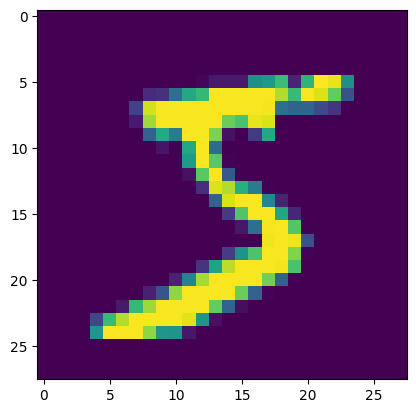

In [4]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])
print(f'Unique classes: {np.unique(y_train)}')
print(y_train[:10])

- MLP takes vectors as inputs
- How to change images into MLP input?
  We vectorize them by using the reshape() method.

In [5]:
# reshaping all the training and testing datasets by removing one dimension
X_train = X_train.reshape(-1, 28*28)
print(f"X_train.shape:{X_train.shape}")

X_test = X_test.reshape(-1, 28*28)
print(f"X_test.shape:{X_test.shape}")

# keras models need float32 inputs
print(f"X_train.dtype:{X_train.dtype}")
X_train = X_train.astype('float32')
print(f"X_train.dtype:{X_train.dtype}")
X_test = X_test.astype('float32')

X_train.shape:(60000, 784)
X_test.shape:(10000, 784)
X_train.dtype:uint8
X_train.dtype:float32


### Keras Sequential Model
- Sequential model is basically a linear composition of Keras Layers.
  - It creates a FFNN
- This is simply a linear stack of neural network layers, and it's perfect for the type of feed-forward model like MLP

We know import the Sequential model type from Keras and the first layer type Dense.
  - A fully-connected layer, like in MLP

In [6]:
from tensorflow.keras.models import Sequential
# dense is a fully connected layer
from tensorflow.keras.layers import Dense

tf.keras.layers.Dense(units=,
                      activation=None,
                      use_bias=True,
                      kernel_initializer='glorot_uniform',
                      bias_initializer='zeros',
                      kernel_regularizer=None,
                      bias_regularizer=None,
                      activity_regularizer=None,
                      kernel_constraint=None,
                      bias_constraint=None,
                      **kwargs)

- units - positive integer, dimensionality of the output space
- activation - activation function to use. If we don't specify anything, no activation is applied (linear activation a(x) = x)
- use_bias - boolean, whether the layer uses a bias vector.
- kernel_initializer - initializer for the kernel weights matrix
- bias_initializer - initializer for the bias vector
- kernel_regularizer - regularizer function applied to the kernel weights matrix
- bias_regularizer - regularizer function applied to the bias vector
- activity_regularizer - regularizer function applied to the output of the layer (its 'activation')
- kernel_constraint - constraint function applied to the kernel weights matrix
- bias_constraint - constraint function applied to the bias vector


In [7]:
import numpy as np

np.random.seed(42) # for reproducibility
tf.random.set_seed(42)

num_classes = len(np.unique(y_train))
print(f'Number of classes: {num_classes}')

# create a Sequential model
model = Sequential([
    # First hidden layer. Input data with size 28*28 and output size 256
        #   256 means you set up this layer with 256 hidden neurons.
        #   Such a value is up to you, typically an hyper-parameter
        # input_shape must be specified just for the first hidden layer
        # in (28*28,) the comma indicates the dimension of the batches,
        #     unknowkn during the implementation
    Dense(256, input_shape=(28*28,), activation='sigmoid'),

    # Second hidden layer. Input data with size 256,
        #    which were same to output of the first hidden layer.
        #    output size 128, we set up 128 neurons  in this hidden layer.
        # No need to give input size here because keras gets it automatically.
    Dense(128, activation='sigmoid'),

    # output layer. the number of output should be your number
        #    of classification
        # Softmx for multiclass classification
    Dense(num_classes, activation='softmax')
])

Number of classes: 10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Alternatively, we can define the model and then the add() method to add layers

In [8]:
np.random.seed(42) # for reproducibility
tf.random.set_seed(42)

## alternative definition usinf Sequential.add()
model = Sequential()
model.add(Dense(256, input_shape=(28*28,), activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

- Third alternative, we can use the tensorflow.keras.Model class, along with an tensorflow.keras.Input class
  - This alternativee is useful when we need to define models with multiple inputs and/or multiple outputs.

In [9]:
np.random.seed(42)
tf.random.set_seed(42)

input = tf.keras.Input(shape=(28*28,))
hid = tf.keras.layers.Dense(256, activation='sigmoid')(input)
hid = tf.keras.layers.Dense(128, activation='sigmoid')(hid)
output = tf.keras.layers.Dense(num_classes, activation='sigmoid')(hid)
model = tf.keras.Model(input, output)

In [10]:
model.summary() # print out the model structure

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Number of Parameters:
- First layer: **input size** = 784+1(+1 for bias), **output size** = 256. we have totally (784+1)* 256 = 200960 parameters

- Second layer: **input size** = 256 + 1, **output size** = 128. We have totally (256+1)* 128 = 32896 parameters

- output layer: **input size** = 128 + 1, **output size** = 10. We have totally (128+1)* 10 = 1290 parameters

Compile the model:
- Keras Model class provides a method, compile() to compile the model
- It transforms the model into a computational graph (possibly static), to get the best execution performance.
- The argument and default value of the compile() method is as follows:


Model.compile(optimizer='rmsprop',
              loss=None,
              metrics=None,
              loss_weights=None,
              weighted_metrics=None,
              run_eagerly=None,
              steps_per_execution=None,
              jit_compile=None,
              **kwargs)

Parameters:
- **optimizer**: String (name of optimizer) or optimizer instance. See tf.keras.optimizers

* **loss**: Loss function. May be a string (name of loss function), or a tf.keras.losses.Loss instance. See tf.keras.losses

* **metrics**: List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance. See tf.keras.metrics.

In [11]:
model.compile(optimizer='SGD', # stochastic gradient descent
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

- sparse_categorical_crossentropy:
  - It is the cross entropy (CE) loss, the sparse stands for automatic transformation of the labels into one-hot vectors
    - we do not need to transform them manually
    - we can provide the integer labels 0, ..., 9
  - As studied, CE is suitable for multiclass classification
  - We expect labels to be provided as integers
  - Use CategoricalCrossentropy loss if we want to provide lables using one-hot representation

  ### Fitting/Training the model

  - We invoke the method fit on the Model instance
  - THe whole training is hidden!

In [12]:
batch_size = 64
epochs = 30
model.fit(X_train, y_train,
          epochs=epochs,
          batch_size=batch_size,
          validation_split=0.1)

Epoch 1/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5251 - loss: 1.8907 - val_accuracy: 0.8640 - val_loss: 0.8932
Epoch 2/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8431 - loss: 0.8217 - val_accuracy: 0.9017 - val_loss: 0.5110
Epoch 3/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8818 - loss: 0.5313 - val_accuracy: 0.9162 - val_loss: 0.3783
Epoch 4/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8973 - loss: 0.4185 - val_accuracy: 0.9240 - val_loss: 0.3180
Epoch 5/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9067 - loss: 0.3585 - val_accuracy: 0.9343 - val_loss: 0.2778
Epoch 6/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9146 - loss: 0.3180 - val_accuracy: 0.9367 - val_loss: 0.2516
Epoch 7/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9215 - loss: 0.2915 - val_accuracy: 0.9410 - val_loss: 0.2324
Epoch 8/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9257 - loss: 0.2696 - val_accuracy: 0

### Predict Test Data


In [13]:
pred = model.predict(X_test)
print(f'pred,shape: {pred.shape}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
pred,shape: (10000, 10)


In [14]:
# getting categorical prediction
# the output neuron with maximum value (among the 10 neurons)
# corersponds to the prediction

print(pred[0])
cat_pred = np.argmax(pred, axis=1)
print(f'cat_pred.shape: {cat_pred.shape}')
print(cat_pred[0])

[0.5016589  0.1418801  0.7851711  0.8209257  0.0392064  0.47451612
 0.00235043 0.9998859  0.15147945 0.8762447 ]
cat_pred.shape: (10000,)
7


In [15]:
# compute the test accuracy
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, cat_pred))

0.9585


## Exercise:
* ## Split the training data into train and validation sets (use for instance 80% and 20%)
* ## Operate a model selection for the following hyper-parameters
1. ### **number of layers**, for instance try (1 or 2 hidden layers)
2. ### **Number of hidden units** fixed the numer of layers (256 or 1024)
3. ### **Batch size** (try 32 or 128). What main  differences do you observe?
4. ### **Number of epochs** if needed increase it.


1. Split training data into train and validation sets

In [16]:
from sklearn.model_selection import train_test_split

train_data, val_data, train_lab, val_lab = train_test_split(X_train, y_train,
                                                            test_size=0.2)

print(f"train_data.shape:{train_data.shape},val_data.shape:{val_data.shape}")
print(f"train_lab.shape:{train_lab.shape},val_lab.shape:{val_lab.shape}")

## use following code to merge againg train and validation data for the final training

#X_train = np.concatenate([train_data, val_data])
#y_train = np.concatenate([train_lab, test_lab])


train_data.shape:(48000, 784),val_data.shape:(12000, 784)
train_lab.shape:(48000,),val_lab.shape:(12000,)


2. Fix a set of possible configurations of all hyper-parameters

In [17]:
n_layers = [1, 2]
n_hidden_units = [256, 1024]
batch_sizes = [32, 128]

n_epochs = 30

3. Loop over any possible configuration

  - for any config, train a model on training data

  - Evaluate the performance on validation data

  - Pic the configuration having the highest accuracy on validation data

In [18]:
import tensorflow as tf

num_classes = len(np.unique(y_train))

# for reproducibility
def setRandomSeed(seed):
    np.random.seed(seed)
    tf.random.set_seed(seed)

def defineModelAndTrain(n_layers, n_hidden_units, batch_size, seed=42):
    setRandomSeed(seed)
    model = Sequential()
    model.add(Dense(256, input_shape=(28*28,), activation='sigmoid'))
    for _ in range(n_layers):
        model.add(Dense(n_hidden_units, activation='sigmoid'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(train_data, train_lab, epochs=n_epochs,
              batch_size=batch_size, verbose=0)
    return model

In [19]:
# Running the model selection
# Selecting the configuration with the highest accuracy on the validation data

max_accuracy = -1
max_accuracy_model_config = None

import warnings
warnings.filterwarnings('ignore')

for layers in n_layers:
    for hidden_units in n_hidden_units:
        for batch_size in batch_sizes:
            model = defineModelAndTrain(layers, hidden_units, batch_size)

            pred = model.predict(val_data)
            acc = accuracy_score(val_lab, np.argmax(pred, axis=1))

            print(f'Configuration: {(layers, hidden_units, batch_size)} -> accuracy: {acc}')

            if acc > max_accuracy:
                max_accuracy, max_accuracy_model_config = acc, (layers, hidden_units, batch_size)

print(f'Max accuracy: {max_accuracy} with configuration {max_accuracy_model_config}')

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Configuration: (1, 256, 32) -> accuracy: 0.9581666666666667
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Configuration: (1, 256, 128) -> accuracy: 0.9368333333333333
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Configuration: (1, 1024, 32) -> accuracy: 0.9556666666666667
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Configuration: (1, 1024, 128) -> accuracy: 0.939
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Configuration: (2, 256, 32) -> accuracy: 0.9493333333333334
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Configuration: (2, 256, 128) -> accuracy: 0.9229166666666667
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Configuration: (2, 1024, 32) -> accuracy: 0.9521666666666667
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Configuration: (2, 1024, 128) -> accuracy: 0.9284166666666667
Max accuracy: 0.9581666666666667 with configuration (1, 256, 32)


In [20]:
# Alternatively, equivalent solution using itertools library
from sklearn.metrics import accuracy_score
import itertools

max_accuracy = -1
max_accuracy_model_config = None

# Cartesian product of the 'sets' of candidate values of parameters
candidate_configurations = itertools.product(n_layers, n_hidden_units, batch_sizes)
# print(list(candidate_configurations))

for config in candidate_configurations:

    model = defineModelAndTrain(*config)

    pred = model.predict(val_data)
    acc = accuracy_score(val_lab, np.argmax(pred, axis=1))

    print(f"Configuration: (n_layers, n_hidden_units, batch_size): {config} -> acc: {acc}")

    if acc > max_accuracy:
        max_accuracy, max_accuracy_model_config = acc, config

print(f"Max accuracy: {max_accuracy} with configuration {max_accuracy_model_config}")


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Configuration: (n_layers, n_hidden_units, batch_size): (1, 256, 32) -> acc: 0.95675
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Configuration: (n_layers, n_hidden_units, batch_size): (1, 256, 128) -> acc: 0.93725
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Configuration: (n_layers, n_hidden_units, batch_size): (1, 1024, 32) -> acc: 0.9573333333333334
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Configuration: (n_layers, n_hidden_units, batch_size): (1, 1024, 128) -> acc: 0.9390833333333334
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Configuration: (n_layers, n_hidden_units, batch_size): (2, 256, 32) -> acc: 0.95075
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Configuration: (n_layers, n_hidden_units, batch_size): (2, 256, 128) -> acc: 0.9275
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Configuration: (n_layers, n_hidden_units, batch_size): (2, 1024, 32) -> acc: 0.95
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Configuration: (n_layers, n_hidden_units, batch_size): (2, 1

4. Merge again train and validation data to get a unique training set

In [21]:
# Merging training and validation data

X_train = np.concatenate([train_data, val_data])
y_train = np.concatenate([train_lab, val_lab])

5. Train the final model with the chosen configuration and evaluate it on the test set

In [22]:
# training a final model with the best configuration
# predicting the test data to compute the final estimate of model accuracy

n_layers, n_hidden_units, batch_size = max_accuracy_model_config

model = Sequential()
model.add(Dense(256, input_shape=(28*28,), activation='sigmoid'))
for _ in range(n_layers):
    model.add(Dense(n_hidden_units, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, verbose=0)

pred = model.predict(X_test)
acc = accuracy_score(y_test, np.argmax(pred, axis=1))

print(f'Accuracy: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.9605


### Exploring the fit() cunction

- We know redefine the fit content line by line
- We define a custom model, subclass of t.keras.Model
- Need to redefine the train_step() method

In [23]:
class CustomModel(tf.keras.Model):
    def train_step(self, data):
        # unpack the data. Its structure depends on your model and
        # on what you pass to fit()
        x, y = data
        # GradientTape is necessary for automatic differentiation
        # it is used to record ('tape') a sequence of operations
        # performed upon some input and producing some output, so that the output can
        # be differentiated with respect to the input
        with tf.GradientTape() as tape:
            y_pred = self(x, training=True) # forward pass
            # compute the loss value
            # the loss function is configured in compile()
            loss = self.compiled_loss(y, y_pred, regularization_losses=self.losses)

            # select parameter
            trainable_vars = self.trainable_variables
            # compute gradients w.r.t. parameters
            gradients = tape.gradient(loss, trainable_vars)
            # update weights
            self.optimizer.apply_gradients(zip(gradients, trainable_vars))
            # update metrics and store them in the object (includes the metric that tracks the loss)
            self.compiled_metrics.update_state(y, y_pred)
            # return a dict mapping metric names to current value
            return {m.name: m.result() for m in self.metrics}

- Now we redefine the model with class CustomModel
  - We cannot use Sequential, we need to say which are the input and output layers
  - We will use the Input layer of Keras

In [25]:
np.random.seed(42)
tf.random.set_seed(42)

#model = Sequential()
#model.add(Dense(256, input_shape=(28*28,), activation='sigmoid'))
#model.add(Dense(128, activation='sigmoid'))
#model.add(Dense(num_classes, activation='softmax'))

input = tf.keras.Input(shape=(28*28,))
hid = tf.keras.layers.Dense(256, activation='sigmoid')(input)
hid = tf.keras.layers.Dense(128, activation='sigmoid')(hid)
output = tf.keras.layers.Dense(num_classes, activation='sigmoid')(hid)

model = CustomModel(input, output)

model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

batsh_size = 64
epochs = 30
model.fit(X_train, y_train, epochs=epochs, validation_split=0.2)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6054 - loss: 0.4986 - val_accuracy: 0.8716 - val_loss: 0.6396
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8827 - loss: 0.4964 - val_accuracy: 0.8997 - val_loss: 0.4064
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9061 - loss: 0.4897 - val_accuracy: 0.9148 - val_loss: 0.3329
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9162 - loss: 0.4860 - val_accuracy: 0.9211 - val_loss: 0.2991
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9237 - loss: 0.4844 - val_accuracy: 0.9261 - val_loss: 0.2756
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9287 - loss: 0.4840 - val_accuracy: 0.9301 - val_loss: 0.2548
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9340 - loss: 0.4821 - val_accuracy: 0.9363 - val_loss: 0.2382
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9390 - loss: 0.4813 - 

In [26]:
pred = model.predict(X_test)
cat_pred = np.argmax(pred, axis=1)
print(accuracy_score(y_test, cat_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
0.9572
